 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
!pip install torchvision

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Скачаем обучающую и контрольную выборки.

In [ ]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor()]) ## переводим картинку в tensor



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.



Сколько картинок в train? В test?

In [ ]:
len_train = len(trainset)
len_test = len(testset)

print("Кол-во картинок в train: " + str(len_train))
print("Кол-во картинок в test: " + str(len_test))

Кол-во картинок в train: 60000
Кол-во картинок в test: 10000


Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной? в test?

**TRAIN**

In [ ]:
c_r_train = [] # сюда запишем кол-во данных для каждого класса в train

uniq_class = trainset.train_labels.unique() # берем все 10 классов

for i in range(len(uniq_class)):
    c = 0 

    for j in range(len(trainset.train_labels)):

        if uniq_class[i] == trainset.train_labels[j]:

            c += 1

    c_r_train.append(c)

print(c_r_train)


/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


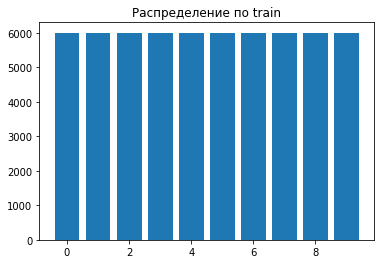

In [ ]:
x = uniq_class
y = c_r_train

plt.title("Распределение по train")
plt.bar(x, y)
plt.show()



**Равномерно**

**TEST**

In [ ]:
c_r_test = [] # сюда запишем кол-во данных для каждого класса в train

uniq_class = testset.test_labels.unique() # берем все 10 классов

for i in range(len(uniq_class)):
    c = 0 

    for j in range(len(testset.test_labels)):

        if uniq_class[i] == testset.test_labels[j]:

            c += 1

    c_r_test.append(c)

print(c_r_test)


/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


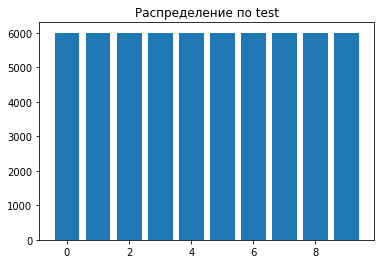

In [ ]:
x = uniq_class
y = c_r_train

plt.title("Распределение по test")
plt.bar(x, y)
plt.show()


**Раваномерно**

* Выведите несколько картинок с помощью `pyplot`

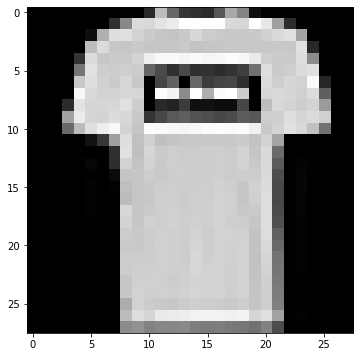

In [ ]:
img = trainset.data[1].numpy() 

fig, ax = plt.subplots()

ax.imshow(img, cmap ='gray')

fig.set_figwidth(6)    
fig.set_figheight(6)  

plt.show()

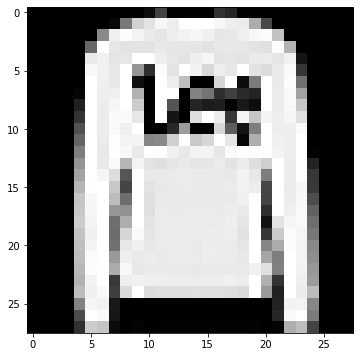

In [ ]:
img = testset.data[1].numpy() 

fig, ax = plt.subplots()

ax.imshow(img, cmap ='gray')

fig.set_figwidth(6)    
fig.set_figheight(6)    

plt.show()

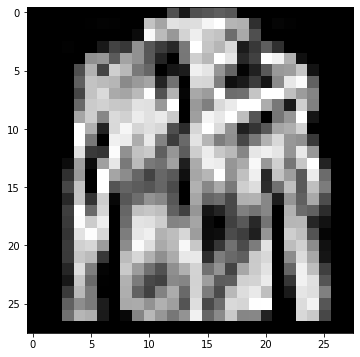

In [ ]:
img = testset.data[17].numpy() 

fig, ax = plt.subplots()

ax.imshow(img, cmap ='gray')

fig.set_figwidth(6)    
fig.set_figheight(6)    

plt.show()

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

## **MLP**

In [ ]:
input_size, hidden_size, out_size = 784, [512,128, 64], 10 # input = 28*28

In [ ]:
from torch import nn
from torch.nn import NLLLoss
from torch.optim import SGD

model = nn.Sequential( #создаем модель
    nn.Linear(input_size, hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0], hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1], hidden_size[2]),
    nn.ReLU(),
    nn.Linear(hidden_size[2], out_size),
    nn.LogSoftmax() #выдаем вероятносьт 
)

learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=None)
)


In [ ]:
epochs = 15
losses = []
training_losses = []

for e in range(epochs):

    running_loss = 0

    for images, labels in trainloader:
    
        #Делаем наще изображение вектром(Flatten)
    
        images = images.view(images.shape[0],-1) 

        # зануляем градиенты (чтобы не было остатка с редыдущего шага)
        optimizer.zero_grad()
    
        # forward pass
        output = model(images)

        #loss
        loss = criterion(output,labels)
    
    
        #backward 
        loss.backward()
    
        # обновляем
        optimizer.step()
    
        running_loss = running_loss + loss.item()
        losses.append(running_loss)
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        training_losses.append(running_loss/len(trainloader))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss: 1.534469678992033
Training loss: 0.6963026427338521
Training loss: 0.5817960750428339
Training loss: 0.5243643554132121
Training loss: 0.48252263163371634
Training loss: 0.4530488596385578
Training loss: 0.43018095512813886
Training loss: 0.4123180584933182
Training loss: 0.39595600305728923
Training loss: 0.3824644017937244
Training loss: 0.3690431491496255
Training loss: 0.35895163679455094
Training loss: 0.3477097432965083
Training loss: 0.3390587058441597
Training loss: 0.3303122461566896


In [ ]:
X_test = testset.data.resize_(10000, 1, 784).float()

In [ ]:
preds = []

for i in range(10000):
    temp = model(X_test[i])
    temp_2 = torch.exp(temp)
    temp_2 = temp_2.detach().numpy()## detach() отеделяет переменнуб от градиента
    preds.append(np.argmax(temp_2))

In [ ]:
from sklearn.metrics import accuracy_score

print("MLP Accuracy: " + str(accuracy_score(testset.targets, preds) * 100) + "%")

MLP Accuracy: 81.78%


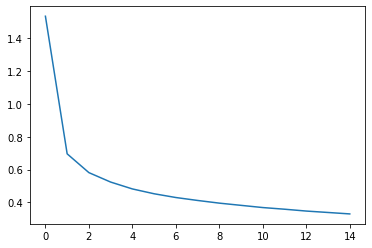

In [ ]:
plt.plot(training_losses)

## **CNN**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F  # Функции свертки

In [ ]:
# Заметьте: класс наследуется от nn.Module
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора родителя
        super(SimpleConvNet, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        # out_channels - это количество фильтров, которые применятся для свёртки
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 4 * 4 * 16)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
from tqdm import notebook # это для прогресс-баров

In [ ]:
training_losses_2 = []

# объявляем сеть
net = SimpleConvNet()

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in notebook.tqdm(range(15)):

    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):

        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)

        #loss
        loss = loss_fn(y_pred, y_batch)
        #backward
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()

    else:
      
        print(f"Training loss: {running_loss/len(trainloader)}")
        training_losses_2.append(running_loss/len(trainloader))        

print('Обучение закончено')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.7406253266191731


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.5250076339839511


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.45534408537470733


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.40942908825960184


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.3772489604855451


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.35529475883341655


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.33803116943704037


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.3244916456720362


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.31150305793144784


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.3000523472613848


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.2917268450945178


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.28344739133120783


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.2750935535483102


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.2672639428832039


  0%|          | 0/15000 [00:00<?, ?it/s]

Training loss: 0.26212240813259186
Обучение закончено


In [ ]:
classes = tuple(str(i) for i in range(10))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 86 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 82 %
Accuracy of Dress : 86 %
Accuracy of  Coat : 85 %
Accuracy of Sandal : 93 %
Accuracy of Shirt : 66 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 95 %


In [ ]:
labels_ = []
preds = []

with torch.no_grad():

    for data in testloader:

        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        labels_.extend(labels.numpy()) # тоже самое что и append, только extend может добавлять тензоры, списки и тд
        preds.extend(predicted.numpy())

In [ ]:
print("CNN Accuracy: " + str(accuracy_score(labels_, preds) * 100) + "%")

CNN Accuracy: 88.71%


## **ИТОГ**

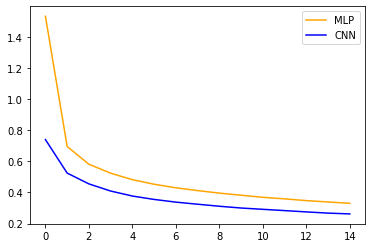

In [ ]:
plt.plot(training_losses, c='orange', label="MLP")
plt.plot(training_losses_2, c='blue', label="CNN")
plt.legend(loc="upper right")
plt.show();
